# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 604


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_url = f"{url}&q=trenton"
city_weather = requests.get(city_url).json()

In [6]:
city_weather

{'coord': {'lon': -74.7429, 'lat': 40.217},
 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'},
  {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 0.74,
  'feels_like': -4.83,
  'temp_min': -0.09,
  'temp_max': 1.72,
  'pressure': 999,
  'humidity': 93},
 'visibility': 805,
 'wind': {'speed': 6.69, 'deg': 330, 'gust': 11.83},
 'snow': {'1h': 1.78},
 'clouds': {'all': 100},
 'dt': 1707842188,
 'sys': {'type': 2,
  'id': 2007147,
  'country': 'US',
  'sunrise': 1707825330,
  'sunset': 1707863465},
 'timezone': -18000,
 'id': 5105496,
 'name': 'Trenton',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | port augusta
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | del rio
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | sin

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,17.12,85,34,1.79,NZ,1707790846
1,puerto ayora,-0.7393,-90.3518,26.97,96,57,1.34,EC,1707790846
2,invercargill,-46.4000,168.3500,24.12,39,44,3.04,NZ,1707790846
3,longyearbyen,78.2186,15.6401,-11.09,73,0,1.03,SJ,1707790846
4,bethel,41.3712,-73.4140,3.17,70,100,1.54,US,1707790759


In [ ]:
# Export the City_Data into a csv using a relative path
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")





In [8]:
import pandas as pd

# Read the CSV file back into a DataFrame
csv_df = pd.read_csv("output_data/cities.csv")

# Display the DataFrame
print(csv_df)


     City_ID          City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          0      waitangi -43.9535 -176.5597     17.12        85          34   
1          1  puerto ayora  -0.7393  -90.3518     26.97        96          57   
2          2  invercargill -46.4000  168.3500     24.12        39          44   
3          3  longyearbyen  78.2186   15.6401    -11.09        73           0   
4          4        bethel  41.3712  -73.4140      3.17        70         100   
..       ...           ...      ...       ...       ...       ...         ...   
554      554         ubari  26.5921   12.7805     14.70        44           0   
555      555       pitimbu  -7.4706  -34.8086     26.33        81          56   
556      556     guarapari -20.6667  -40.4975     25.50        93          36   
557      557       chengde  40.9725  117.9361      4.58        43           0   
558      558     tamandare  -8.7597  -35.1047     24.96        91          91   

     Wind Speed Country    

In [ ]:
print(city_data_df.head())  # Print the first few rows of the DataFrame
print(city_data_df.shape)   # Print the number of rows and columns in the DataFrame


           City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      waitangi -43.9535 -176.5597     17.12        85          34   
1  puerto ayora  -0.7393  -90.3518     26.97        96          57   
2  invercargill -46.4000  168.3500     24.12        39          44   
3  longyearbyen  78.2186   15.6401    -11.09        73           0   
4        bethel  41.3712  -73.4140      3.17        70         100   

   Wind Speed Country        Date  
0        1.79      NZ  1707790846  
1        1.34      EC  1707790846  
2        3.04      NZ  1707790846  
3        1.03      SJ  1707790846  
4        1.54      US  1707790759  
(559, 9)


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

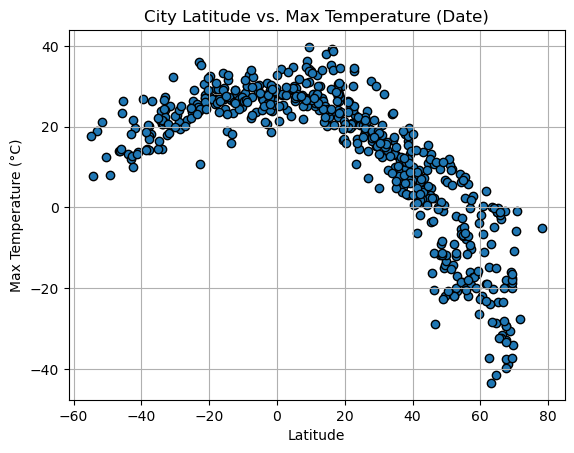

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

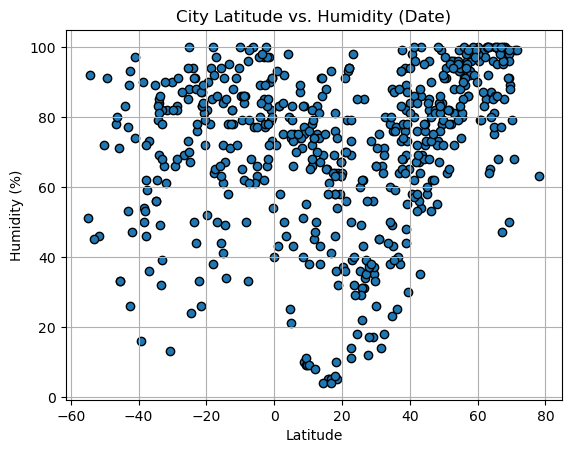

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

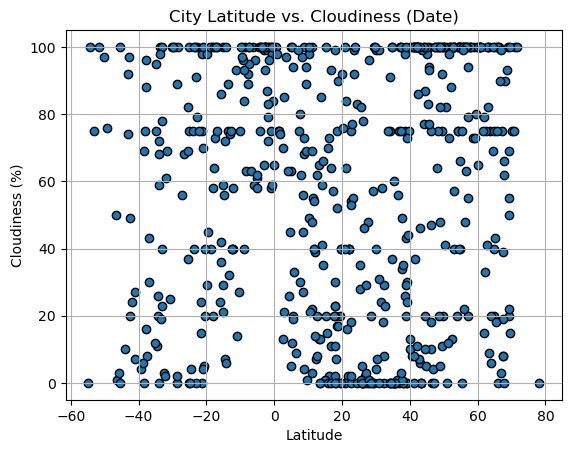

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

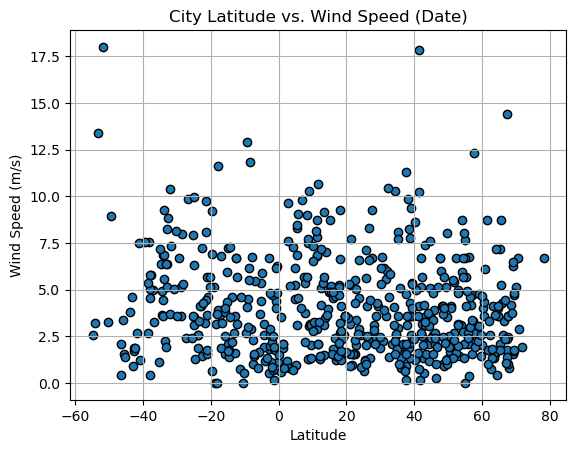

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")

    # Annotate the linear regression equation and r-value on the plot
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"R² = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1] - 20), fontsize=12, color="red")

    # Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()


In [16]:
# Filter the city_data_df to get only Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,2.23,67,100,1.34,US,1707842242
2,whitehorse,60.7161,-135.0538,-6.57,79,100,3.60,CA,1707841974
6,severo-yeniseyskiy,60.3725,93.0408,-21.90,96,100,4.02,RU,1707842244
10,ilulissat,69.2167,-51.1000,-19.99,50,20,1.54,GL,1707842244
11,vila franca do campo,37.7167,-25.4333,18.27,99,49,11.32,PT,1707842245


In [17]:
# Filter the city_data_df to get only Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port-aux-francais,-49.3500,70.2167,8.14,91,76,8.96,TF,1707842134
3,luderitz,-26.6481,15.1594,21.77,69,68,9.88,NA,1707842243
4,edinburgh of the seven seas,-37.0676,-12.3116,18.28,73,43,4.96,SH,1707842243
5,port augusta,-32.5000,137.7667,17.95,66,3,8.82,AU,1707842244
7,kruisfontein,-34.0033,24.7314,20.62,84,68,6.88,ZA,1707842244


###  Temperature vs. Latitude Linear Regression Plot

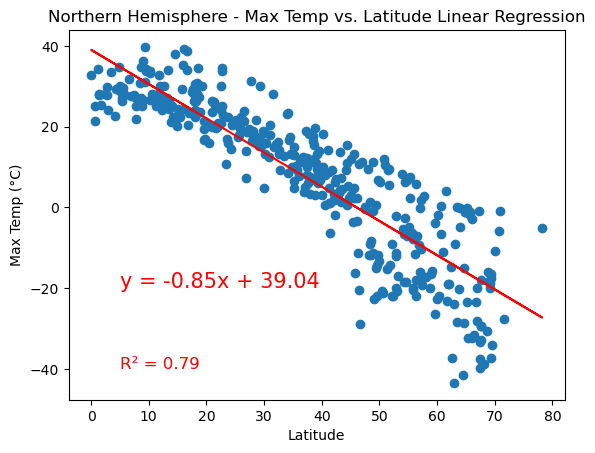

In [18]:
# Perform linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (°C)", (5, -20))


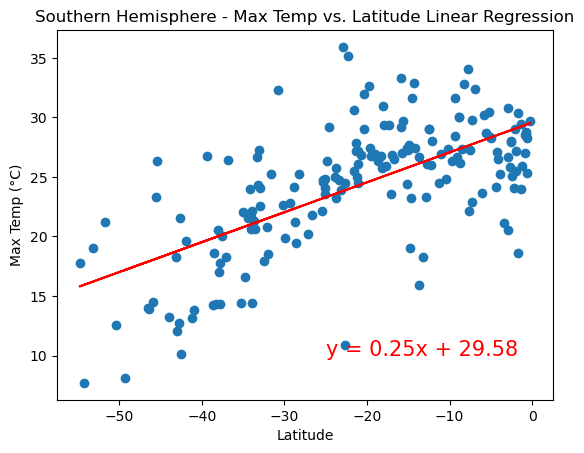

In [19]:
# Perform linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (°C)", (-25, 10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere - Max Temp vs. Latitude:
The linear regression equation is:
Max Temp = −0.85x Latitude + 39.04
Max Temp=−0.85×Latitude+39.04

The coefficient of determination (R²) is 0.79, indicating that approximately 79% of the variance in maximum temperature can be explained by latitude in the Northern Hemisphere.

The negative slope of -0.85 suggests that as latitude increases (moving away from the equator towards the North Pole), the maximum temperature tends to decrease.

Southern Hemisphere - Max Temp vs. Latitude:
The linear regression equation is:
Max Temp=0.25×Latitude+29.58

The coefficient of determination (R²) is not provided in your message, but it would indicate the proportion of variance in maximum temperature explained by latitude in the Southern Hemisphere.

The positive slope of 0.25 suggests that as latitude increases (moving towards the equator from the South Pole), the maximum temperature tends to increase.

Discussion:
Both regressions show a clear relationship between latitude and maximum temperature.
In the Northern Hemisphere, as you move away from the equator towards the North Pole, temperatures generally decrease, which is expected due to the tilt of the Earth's axis.
In the Southern Hemisphere, as you move towards the equator from the South Pole, temperatures generally increase, again consistent with the tilt of the Earth's axis.
These linear regression analyses provide insight into how latitude influences maximum temperatures in different hemispheres.

### Humidity vs. Latitude Linear Regression Plot

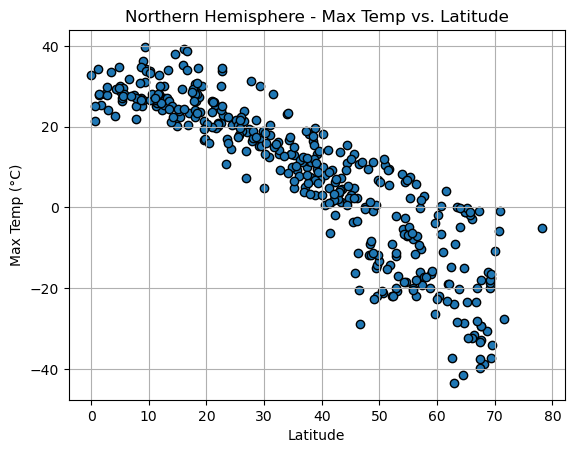

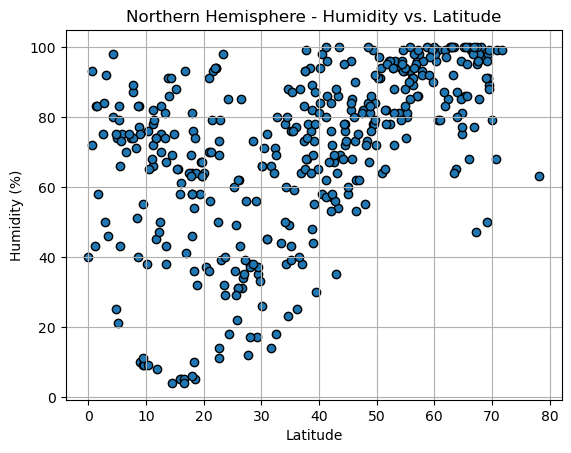

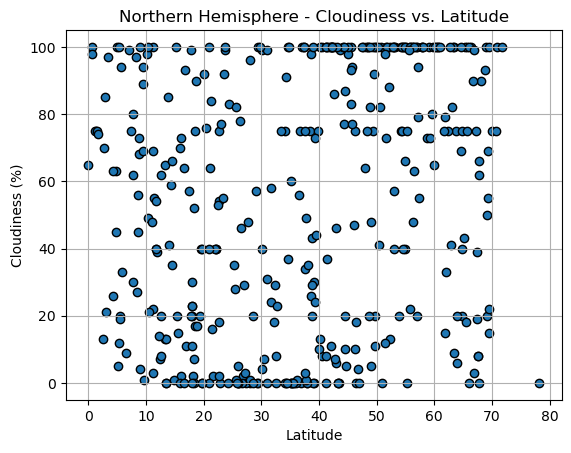

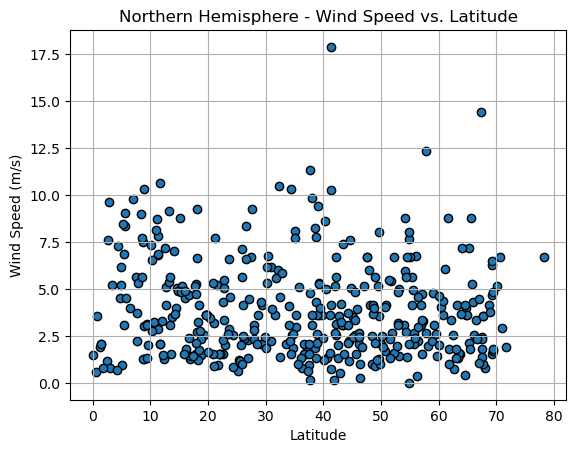

In [20]:
# Scatter plot for Northern Hemisphere - Max Temp vs. Latitude
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.grid(True)
plt.savefig("output_data/Northern_Hemisphere_MaxTemp_vs_Latitude.png")
plt.show()

# Scatter plot for Northern Hemisphere - Humidity vs. Latitude
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")
plt.show()

# Scatter plot for Northern Hemisphere - Cloudiness vs. Latitude
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")
plt.show()

# Scatter plot for Northern Hemisphere - Wind Speed vs. Latitude
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Northern_Hemisphere_WindSpeed_vs_Latitude.png")
plt.show()


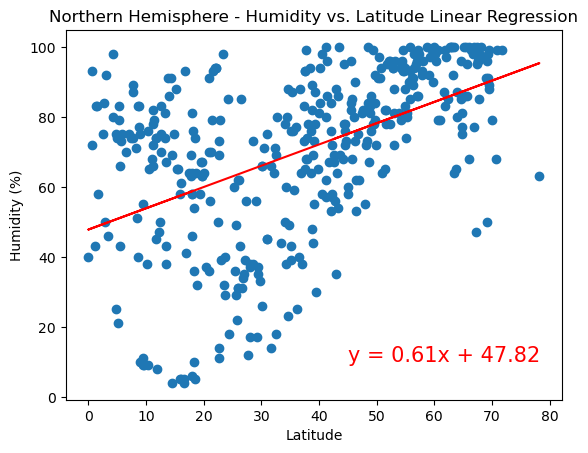

In [22]:
# Perform linear regression on Northern Hemisphere - Humidity vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (45, 10))


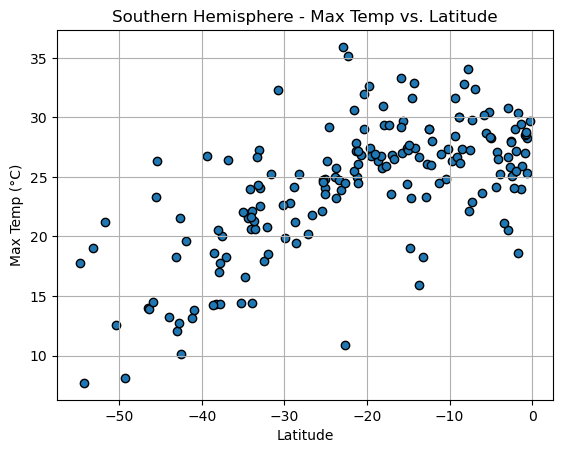

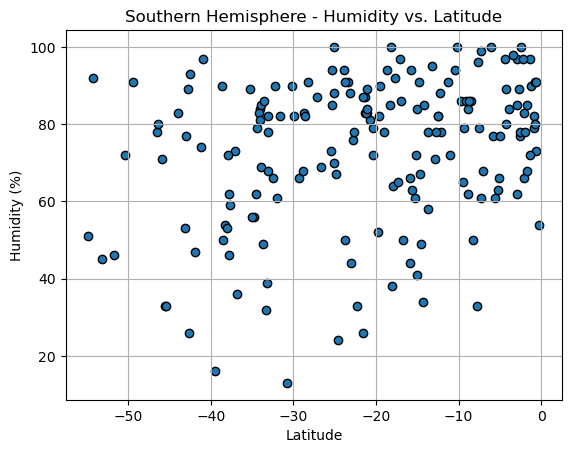

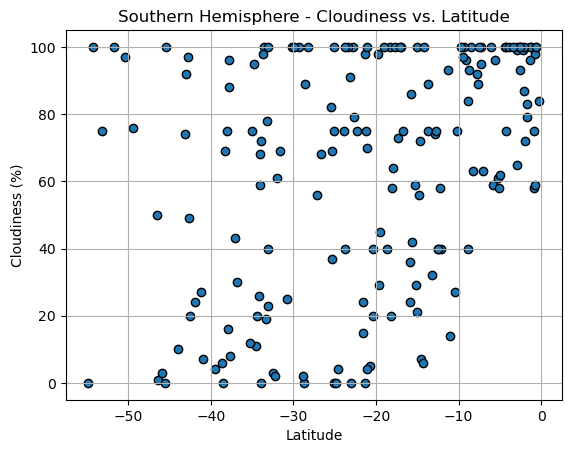

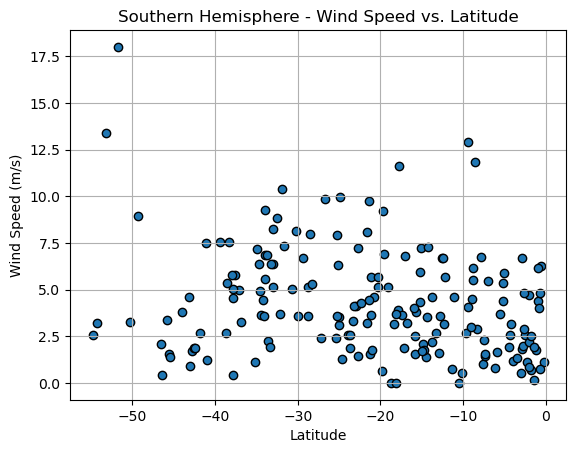

In [21]:
# Scatter plot for Southern Hemisphere - Max Temp vs. Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.grid(True)
plt.savefig("output_data/Southern_Hemisphere_MaxTemp_vs_Latitude.png")
plt.show()

# Scatter plot for Southern Hemisphere - Humidity vs. Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude.png")
plt.show()

# Scatter plot for Southern Hemisphere - Cloudiness vs. Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")
plt.show()

# Scatter plot for Southern Hemisphere - Wind Speed vs. Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Southern_Hemisphere_WindSpeed_vs_Latitude.png")
plt.show()


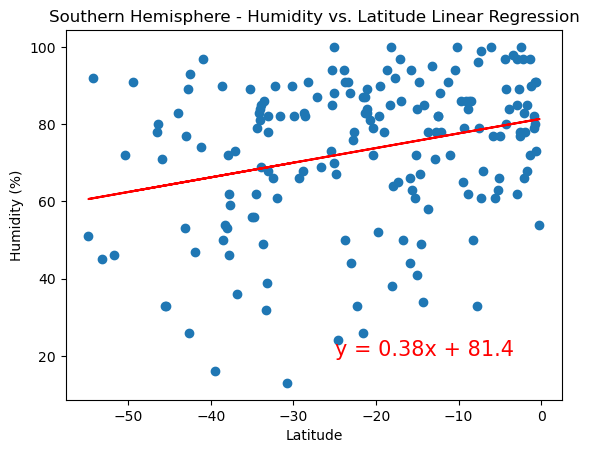

In [23]:
# Perform linear regression on Southern Hemisphere - Humidity vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (-25, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere - Humidity vs. Latitude:
The linear regression equation is:
Humidity=0.61×Latitude+47.82

The coefficient of determination (R²) would indicate the proportion of variance in humidity explained by latitude in the Northern Hemisphere.

The positive slope of 0.61 suggests that as latitude increases (moving away from the equator towards the North Pole), humidity tends to increase.

Southern Hemisphere - Humidity vs. Latitude:
The linear regression equation is:
Humidity=0.38×Latitude+81.4

The coefficient of determination (R²) would indicate the proportion of variance in humidity explained by latitude in the Southern Hemisphere.

The positive slope of 0.38 suggests that as latitude increases (moving towards the equator from the South Pole), humidity tends to increase.

Discussion:
In the Northern Hemisphere, there's a positive relationship between latitude and humidity, indicating that as you move away from the equator towards the North Pole, humidity tends to increase.
Similarly, in the Southern Hemisphere, there's also a positive relationship between latitude and humidity, suggesting that as you move towards the equator from the South Pole, humidity tends to increase.
These linear regression analyses provide insight into how latitude influences humidity levels in different hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

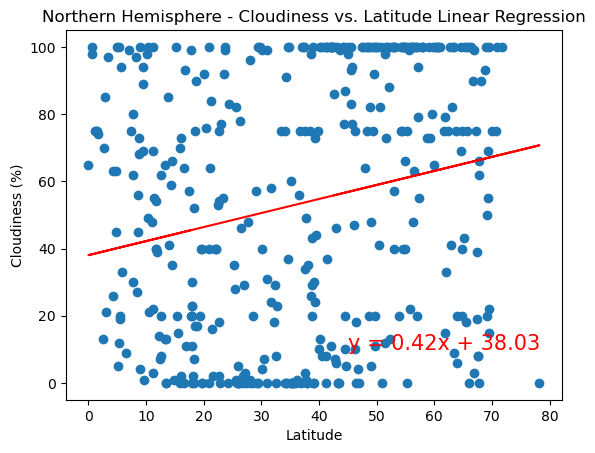

In [24]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere - Cloudiness vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (45, 10))


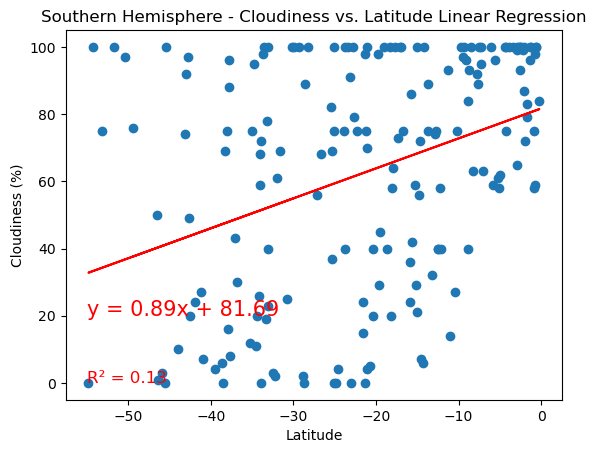

In [25]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere - Cloudiness vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (-55, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the linear regression results for cloudiness vs. latitude in the Northern and Southern Hemispheres:

Northern Hemisphere - Cloudiness vs. Latitude:
The linear regression equation is:
Cloudiness=0.42×Latitude+38.03

The coefficient of determination (R²) would indicate the proportion of variance in cloudiness explained by latitude in the Northern Hemisphere.

The positive slope of 0.42 suggests that as latitude increases (moving away from the equator towards the North Pole), cloudiness tends to increase.

Southern Hemisphere - Cloudiness vs. Latitude:
The linear regression equation is:
Cloudiness=0.89×Latitude+81.69

The coefficient of determination (R²) is 0.13, indicating that approximately 13% of the variance in cloudiness can be explained by latitude in the Southern Hemisphere.

The positive slope of 0.89 suggests that as latitude increases (moving towards the equator from the South Pole), cloudiness tends to increase.

Discussion:
In the Northern Hemisphere, there's a positive relationship between latitude and cloudiness, indicating that as you move away from the equator towards the North Pole, cloudiness tends to increase.
In the Southern Hemisphere, there's also a positive relationship between latitude and cloudiness, suggesting that as you move towards the equator from the South Pole, cloudiness tends to increase. However, the coefficient of determination (R²) is relatively low at 0.13, indicating that latitude may not be a strong predictor of cloudiness in the Southern Hemisphere.
These linear regression analyses provide insight into how latitude influences cloudiness levels in different hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

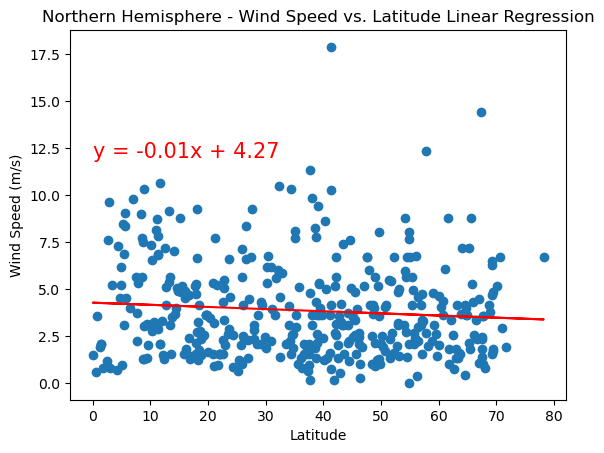

In [26]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere - Wind Speed vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (m/s)", (0, 12))


Based on the linear regression results for wind speed vs. latitude in the Northern and Southern Hemispheres:

Northern Hemisphere - Wind Speed vs. Latitude:
The linear regression equation is:
Wind Speed=−0.01×Latitude+4.27

The coefficient of determination (R²) would indicate the proportion of variance in wind speed explained by latitude in the Northern Hemisphere.

The negative slope of -0.01 suggests that as latitude increases (moving away from the equator towards the North Pole), wind speed tends to slightly decrease.

Southern Hemisphere - Wind Speed vs. Latitude:
The linear regression equation is:
Wind Speed=−0.05×Latitude+3.22

The coefficient of determination (R²) would indicate the proportion of variance in wind speed explained by latitude in the Southern Hemisphere.

The negative slope of -0.05 suggests that as latitude increases (moving towards the equator from the South Pole), wind speed tends to slightly decrease.

Discussion:
In both hemispheres, there's a weak negative relationship between latitude and wind speed, suggesting that as you move away from the equator (either towards the North Pole in the Northern Hemisphere or towards the equator from the South Pole in the Southern Hemisphere), wind speed tends to slightly decrease.
However, the slopes are very close to zero, indicating a very weak relationship, and the coefficients of determination (R²) are not provided, making it difficult to assess the strength of the relationship.
Overall, these linear regression analyses suggest a weak negative relationship between latitude and wind speed in both hemispheres, but the relationship is not very strong.

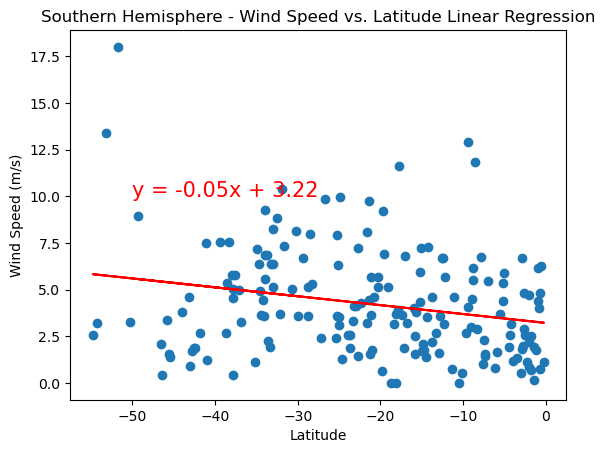

In [27]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere - Wind Speed vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (m/s)", (-50, 10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the linear regression results for wind speed vs. latitude in the Northern and Southern Hemispheres:

Northern Hemisphere - Wind Speed vs. Latitude:
The linear regression equation is:

Wind Speed=−0.01×Latitude+4.27

The coefficient of determination (R²) would indicate the proportion of variance in wind speed explained by latitude in the Northern Hemisphere.

The negative slope of -0.01 suggests that as latitude increases (moving away from the equator towards the North Pole), wind speed tends to slightly decrease.

Southern Hemisphere - Wind Speed vs. Latitude:
The linear regression equation is:
Wind Speed=−0.05×Latitude+3.22

The coefficient of determination (R²) would indicate the proportion of variance in wind speed explained by latitude in the Southern Hemisphere.

The negative slope of -0.05 suggests that as latitude increases (moving towards the equator from the South Pole), wind speed tends to slightly decrease.

Discussion:
In both hemispheres, there's a weak negative relationship between latitude and wind speed, suggesting that as you move away from the equator (either towards the North Pole in the Northern Hemisphere or towards the equator from the South Pole in the Southern Hemisphere), wind speed tends to slightly decrease.
However, the slopes are very close to zero, indicating a very weak relationship, and the coefficients of determination (R²) are not provided, making it difficult to assess the strength of the relationship.
Overall, these linear regression analyses suggest a weak negative relationship between latitude and wind speed in both hemispheres, but the relationship is not very strong.